<a href="https://colab.research.google.com/github/tpessoa-dev/deep-learning/blob/main/Exemplo_Regress%C3%A3o_MLP_dataset_HousePricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
from matplotlib import pyplot as plt
import pandas as pd
from pandas import read_csv
from pandas import set_option
import seaborn as sb

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

#import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
#necessita do pydot pip install pydot
from keras.utils.vis_utils import plot_model


In [ ]:
# Load dataset
filename = ("https://telescopeinstorage.blob.core.windows.net/datasets/housing.csv")
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataset = read_csv(filename, delim_whitespace=True, names=names,engine='python')


In [ ]:
#- CRIM     per capita crime rate by town
#- ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
#- INDUS    proportion of non-retail business acres per town
#- CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
#- NOX      nitric oxides concentration (parts per 10 million)
#- RM       average number of rooms per dwelling -  é o número médio de cômodos entre os imóveis na vizinhança.
#- AGE      proportion of owner-occupied units built prior to 1940
#- DIS      weighted distances to five Boston employment centres
#- RAD      index of accessibility to radial highways
#- TAX      full-value property-tax rate per $10,000
#- PTRATIO  pupil-teacher ratio by town - é a razão de estudantes para professores nas escolas de ensino fundamental e médio na vizinhança.
#- B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
#- LSTAT    % lower status of the population - é a porcentagem de proprietários na vizinhança considerados de "classe baixa" (proletariado).
#- MEDV     Median value of owner-occupied homes in $1000's

dataset.head(20)

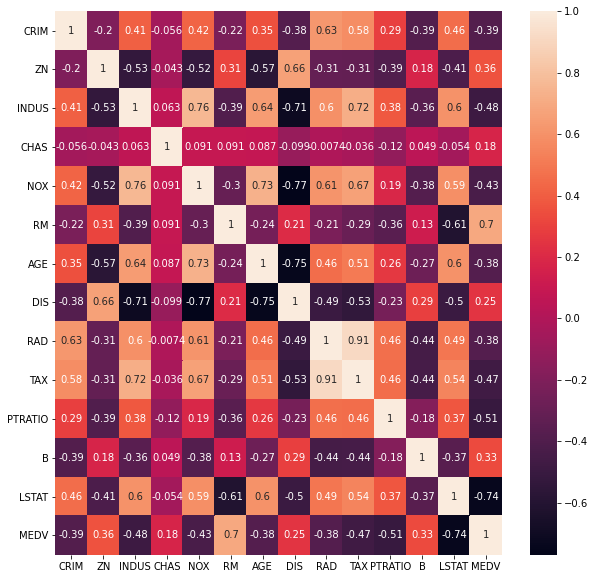

In [ ]:
corr = dataset.corr(method='pearson')
plt.figure(figsize=(10, 10))
sb.heatmap(corr, annot = True)

In [ ]:
prices = dataset['MEDV']
# Exclusão das caracteristicas com alta correlação
dataset = dataset.drop(['INDUS','NOX','AGE','RAD'], axis = 1)
features = dataset.drop('MEDV', axis = 1)
dataset.head()

,CRIM,ZN,CHAS,RM,DIS,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,0,6.575,4.0900,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,0,6.421,4.9671,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,0,7.185,4.9671,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,0,6.998,6.0622,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,0,7.147,6.0622,222.0,18.7,396.90,5.33,36.2


In [ ]:
features.head()

,CRIM,ZN,CHAS,RM,DIS,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,0,6.575,4.0900,296.0,15.3,396.90,4.98
1,0.02731,0.0,0,6.421,4.9671,242.0,17.8,396.90,9.14
2,0.02729,0.0,0,7.185,4.9671,242.0,17.8,392.83,4.03
3,0.03237,0.0,0,6.998,6.0622,222.0,18.7,394.63,2.94
4,0.06905,0.0,0,7.147,6.0622,222.0,18.7,396.90,5.33


In [ ]:
prices.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [ ]:
# Split-out validation dataset
seed = 7
test_size = 0.30

X = features.values
y = prices.values

In [ ]:
scalar = MinMaxScaler()
X = scalar.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [ ]:
qtd_features = len(X[0,:])
qtd_features

9

In [ ]:
qtd_amostras = len(X[:,0])
qtd_amostras

506

In [ ]:
X_train.shape

(354, 9)

In [ ]:
y

In [ ]:
model = Sequential()
model.add(Dense(12, input_dim=qtd_features, activation='relu'))
model.add(Dense(12, activation='relu'))
#Adiciona uma camada de saída sem função de ativação fazendo a apenas a multiplicação das caracteristicas x pesos
model.add(Dense(1))

In [ ]:
# Usa a função de perda mse (mean square error) e monitora o mae (mean absolute erro) e mse (mean square error)
model.compile(loss='mse',optimizer='adam', metrics=['mae', 'mse'])

In [ ]:
plot_model(model, to_file='mlp-seq.png', show_shapes=True, show_layer_names=True)


In [ ]:
model.fit(X_train, y_train, epochs=300, batch_size=4)

In [ ]:
X_test

In [ ]:
y_pred = model.predict(X_test)
y_pred

In [ ]:
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(math.sqrt(mean_squared_error(y_test, y_pred)))

2.8529651422249644
24.47978779592078
4.947705306090974


In [ ]:
dfresult = pd.DataFrame({
        "Preço Original": y_test,
        "Preço Predito": y_pred[:,0]
    })

In [ ]:
dfresult.head(20)

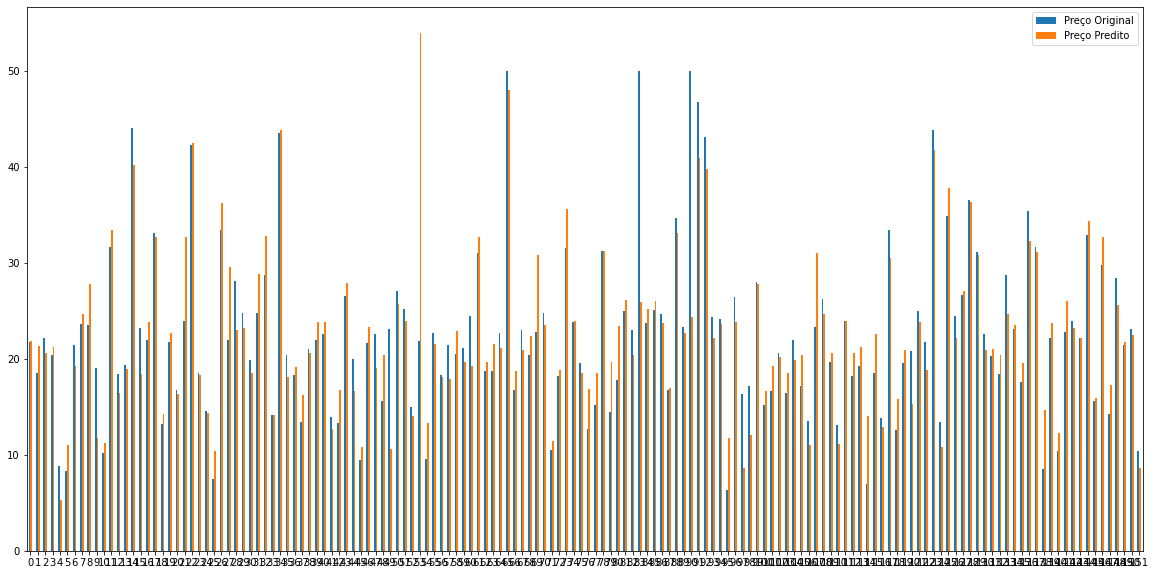

In [ ]:

dfresult.plot.bar(rot=0, figsize = (20,10))